# Xray tomography using regularised linear least squares #

In this inversion test problem we consider performing X-Ray Tomography (XRT) to image the interior of a structure. We assume that the x-rays travel at the same speed regardless of the medium through which they are passing, and so their paths are straight lines between source and receiver. However, the medium causes the x-rays to attenuate: paths through dense objects (such as bones) arrive at the receiver with far less energy than they had at the source. Thus, by analysing the attenuation along many different paths, we can build up a picture of the interior of an object.

Specifically, we will assume that the intensity at the receiver, $I_{rec}$, is related to the intensity at the source, $I_{src}$ by $$I_{rec} = I_{src}\exp\left\{-\int_\mathrm{path} \mu(\mathbf{x})\,\mathrm{d}\mathbf{l}\right\}$$ where $\mu(\mathbf{x})$ is a position-dependent attenuation coefficient. To obtain a linear inverse problem, we rewrite this as $$-\log \frac{I_{rec}}{I_{src}}=\int_\mathrm{path} \mu(\mathbf{x})\,\mathrm{d}\mathbf{l}\,.$$ We know that $$\int\left[f(x) + g(x)\right]\,\mathrm{d}x = \int f(x)\,\mathrm{d}x + \int g(x)\,\mathrm{d}x$$ so we say that integration is a *linear* operation, and hence we can solve the XRT problem with linear inverse theory. 

We will assume that the object we are interested in is 2-dimensional, so that $\mu(\boldsymbol{x}) = \mu(x,y)$. If we discretize this model, with $N_x$ cells in the $x$-direction and $N_y$ cells in the $y$-direction, we can express $\mu(x,y)$ as an $N_x \times N_y$ vector $\boldsymbol{\mu}$. This is related to the data by
$$d_i = A_{ij}\mu_j $$
where $d_i = -\log {I^{(i)}_{rec}}/{I^{(i)}_{src}}$, and where $A_{ij}$ represents the path length in cell $j$ of the discretized model.

Problem details: 

- Model: 2-dimensional ''image'' containing attenuation coefficients
- Data: Attenuation rate ($-\log \frac{I_{rec}}{I_{src}}$)
- Forward: Linear; integral to get attenuation rate along each raypath; $-\log \frac{I_{rec}}{I_{src}}=\int_\mathrm{path} \mu(\mathbf{x}) \mathrm{d}\mathbf{l}$ 
- Solver: Regularised linear least squares ($\mathbf{m}=\left(\mathbf{A^TA}+\epsilon^2\mathbf{I}\right)^\mathbf{-1}\mathbf{A^Td}$)
- Under-determined
- Iterative: No

Code details:
- Initialise the problem: ``from InversionTestProblems import xrayTomography as xrt_fcn``. Makes the subsequent functions available.
- ``xrt_basics=xrt_fcn.Basics()`` initialises a ``basics`` class object that contains the recorded data (i.e. attenuation rate) and changeable parameters. Setting parameters is optional:
    - xrt_basics.model_size: Set the size of the quadratic model (single integer) to ``[model_size, model_size]``
    - xrt_basics.epsSquared: Regularisation parameter (single float)
    - xrt_basics.subset: Reduce the amount of data used for the inversion (float between 0 and 1). A 1 means all available data is used and 0 means no data at all. Data is chosen randomly.
    - xrt_basics.noise: Adds noise to the data (float between 0 and 1). Noise follows a normal distribution. The maximum of the distribution is set to xrt_basics.noise*maximum(data). 
- ``model = xrt_fcn.init_routine(xrt_basics)`` initialises a starting model consisting of ones with the specified model size.
- ``synthetics, gradient = xrt_fcn.forward(xrt_basics, model)`` creates synthetic data based on the model and source and receiver locations. A gradient is not needed here - ''gradient'' is returned as an empty variable. 
- ``result = xrt_fcn.solver(xrt_basics, model, synthetics, gradient)`` performs the inversion.
- ``xrt_fcn.plot_model(xrt_basics, result)`` plots the result.


Evaluating paths: 100%|██████████| 3969/3969 [00:01<00:00, 2677.50it/s]


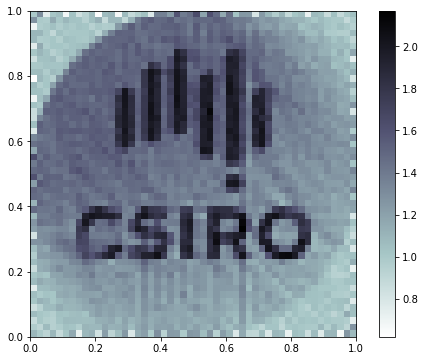

In [1]:
from xrayTomography_data import xrayTomography as xrt_fcn
xrt_basics=xrt_fcn.Basics()
xrt_basics.model_size=50
xrt_basics.epsSquared = 0.005
xrt_basics.subset = 1 # subset in percent of all data (chosen randomly)
xrt_basics.noise=0.001  # Noise in percent of highest number in xrt.data 
model = xrt_fcn.init_routine(xrt_basics)
synthetics, gradient = xrt_fcn.forward(xrt_basics, model)
result = xrt_fcn.solver(xrt_basics, model, synthetics, gradient)
xrt_fcn.plot_model(xrt_basics, result)